In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import constants
from matplotlib import patches
from enum import Enum

golden = constants.golden

In [2]:
class Orientation(Enum):
    UP = 1
    RIGHT = 2
    DOWN = 3
    LEFT = 4

def generate_radius(initial_radius):
    long_edge = initial_radius
    short_edge = 1
    while True:
        long_edge, short_edge = short_edge, long_edge - short_edge
        yield long_edge

def rotate(target, center, degree):
    theta = 2 * math.pi * degree / 360 # convert to radian 
    rotation_matrix = np.array([[math.cos(theta), -1 * math.sin(theta)], 
                                [math.sin(theta), math.cos(theta)]])
    rtarget = np.array(target)
    rcenter = np.array(center)
    return np.matmul(rotation_matrix, rtarget - rcenter) + rcenter

def draw_arc(origin, radius, orientation, ax, radius_gen):
    if radius <= 0.01: return None, -1, None
    
    if orientation == Orientation.UP:
        xy = (origin[0] + radius, origin[1])
        arc = patches.Arc(xy, radius * 2, radius * 2, theta1=0, theta2=90, angle=90)
        square = patches.Rectangle(origin, radius, radius)
        next_orientation = Orientation.RIGHT 
        
    elif orientation == Orientation.RIGHT:
        xy = (origin[0], origin[1] - radius)
        arc = patches.Arc(xy, radius * 2, radius * 2, theta1=0, theta2=90, angle=0)
        square = patches.Rectangle(origin, radius, radius, angle = -90)
        next_orientation = Orientation.DOWN
        
    elif orientation == Orientation.DOWN:
        xy = (origin[0] - radius, origin[1])
        arc = patches.Arc(xy, radius * 2, radius * 2, theta1=0, theta2=90, angle=-90)
        square = patches.Rectangle(origin, radius, radius, angle = 180)
        next_orientation = Orientation.LEFT
        
    elif orientation == Orientation.LEFT:
        xy = (origin[0], origin[1] + radius)
        arc = patches.Arc(xy, radius * 2, radius * 2, theta1=0, theta2=90, angle=180)
        square = patches.Rectangle(origin, radius, radius, angle = 90)
        next_orientation = Orientation.UP
    
    square.set_fill(False)
    square.set_linestyle('--')
    square.set_color('red')
    arc.set_color('green')
    arc.set_linewidth(1)
    ax.add_patch(arc)
    ax.add_patch(square)
    
    next_origin = rotate(origin, xy, -90)
    next_radius = next(radius_gen)
    if next_radius >= radius: 
        return None, -1, None
    else:
        return next_origin, next_radius, next_orientation

def draw_spirals(ratio, iteration):
    upper_length = ratio
    fig, ax = plt.subplots(figsize=(16, 6))
    radius_gen = generate_radius(upper_length)

    rect = patches.Rectangle((0, 0), upper_length, 1, ls='-', color='blue', fill=False)
    ax.add_patch(rect)
    rect.set_zorder(999)

    origin, radius, orientation = (0, 0), next(radius_gen), Orientation.UP
    max_iteration = None
    for i in range(iteration):
        origin, radius, orientation = draw_arc(origin, radius, orientation, ax=ax, radius_gen=radius_gen)
        if radius <= 0.01 and max_iteration is None:
            max_iteration = i + 1
    if max_iteration is None: max_iteration = iteration

    ax.set_aspect('equal')

    margin = 0.01
    ax.set_xlim(0 - margin, upper_length + margin)
    ax.set_ylim(0 - margin, 1 + margin)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axis('off')
    
    if max_iteration < iteration:
        title = 'The spiral drawing has completed only {1}/{2} in rectangle with ratio {0:.4f} : 1.' \
                .format(ratio, max_iteration, iteration)
    else:
        title = 'The spiral drawing is completed for {1} times in rectangle with ratio {0:.4f} : 1.' \
                .format(ratio, iteration)
    
    ax.set_title(title)
    fig.patch.set_facecolor('#fafafa')
    
    plt.show()

# Golden Spiral

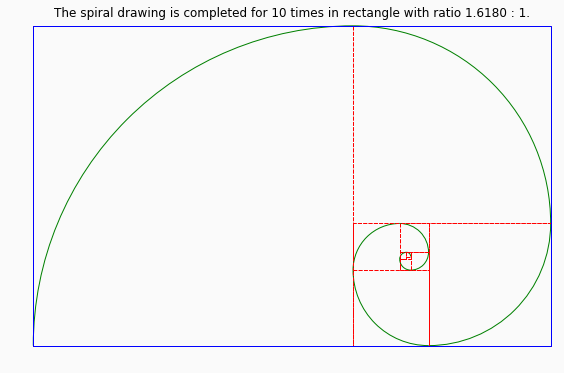

In [3]:
draw_spirals(golden, 10)

# Spirals with Different Ratio

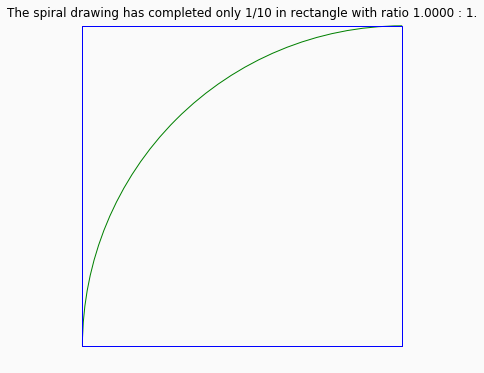

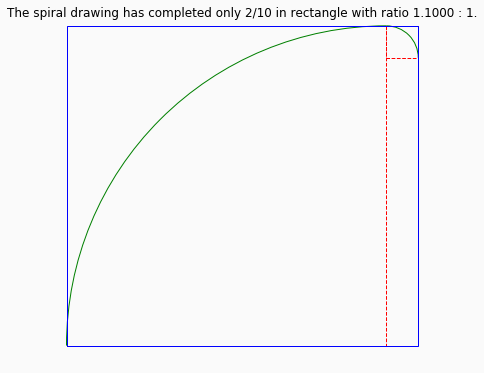

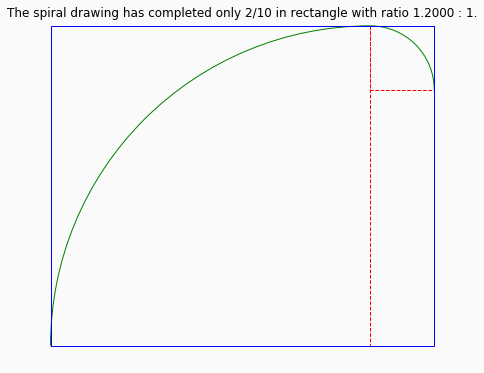

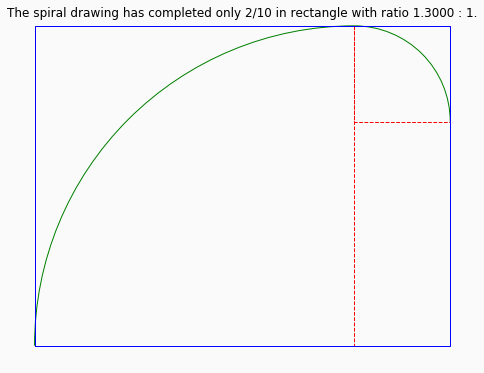

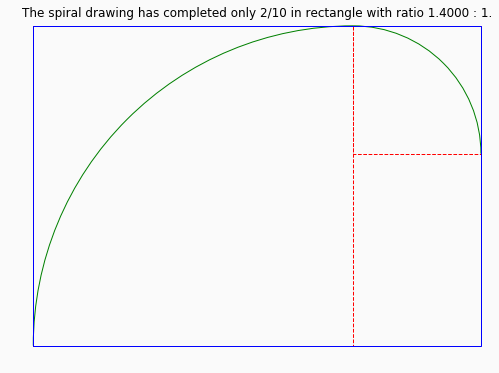

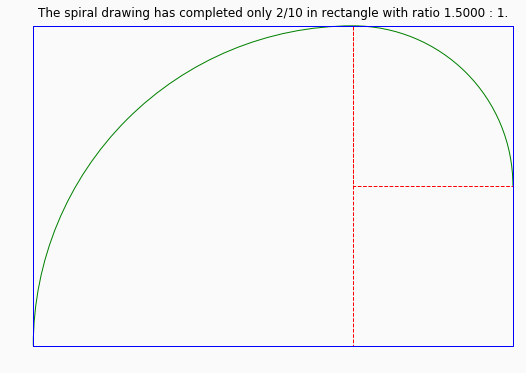

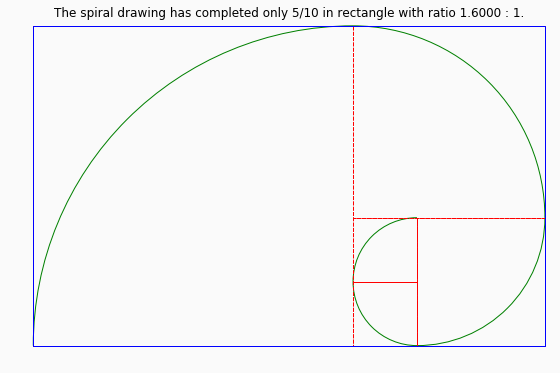

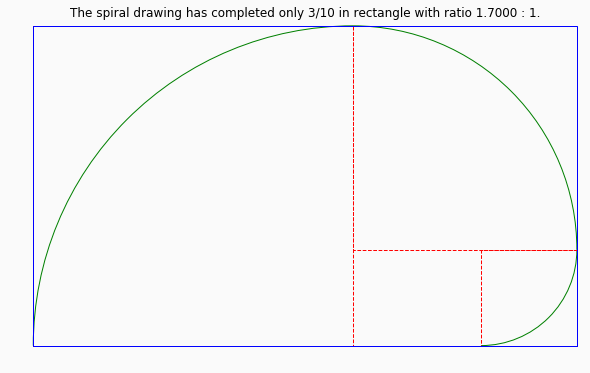

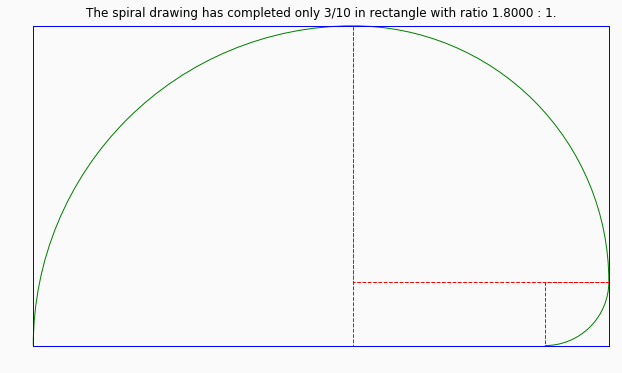

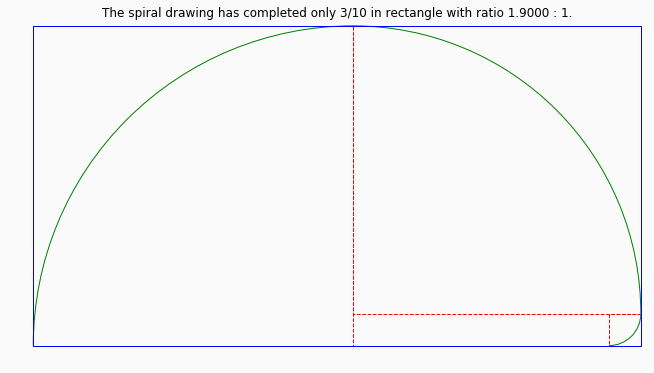

In [4]:
# Not using np.arange() because of the float precision issue
for n in range(0, 10):
    length = 1 + n/10
    draw_spirals(length, 10)